In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score  
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.DataFrame(pd.read_csv("Housing.csv"))

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<AxesSubplot:xlabel='price'>

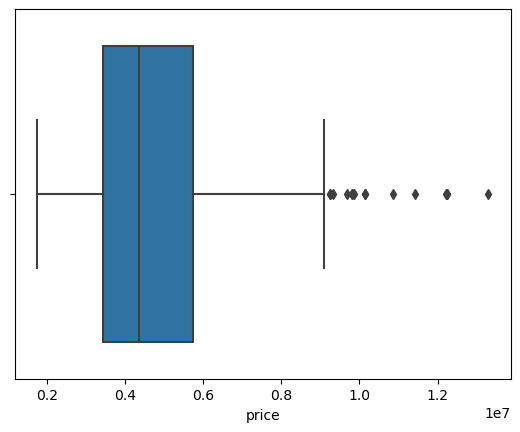

In [7]:
#Checking Outliers
sns.boxplot(x=df['price'])

<AxesSubplot:xlabel='area'>

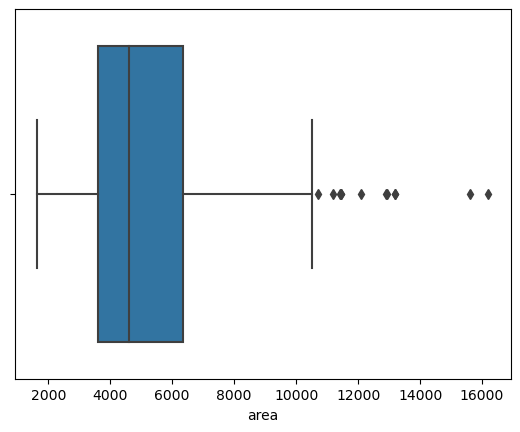

In [8]:
sns.boxplot(x=df['area'])

<AxesSubplot:xlabel='bedrooms'>

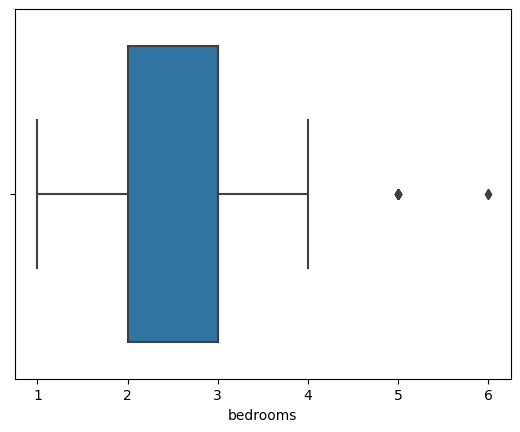

In [9]:
sns.boxplot(x=df['bedrooms'])

<AxesSubplot:xlabel='bathrooms'>

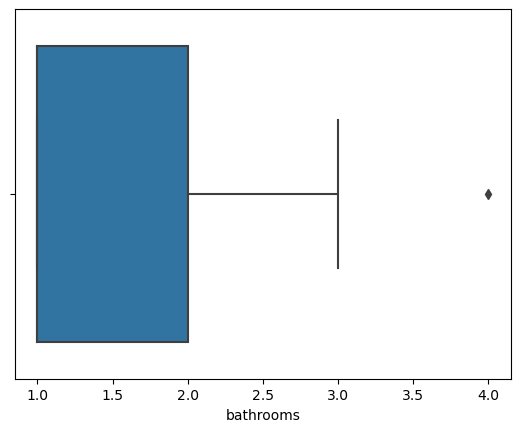

In [10]:
sns.boxplot(x=df['bathrooms'])

<AxesSubplot:xlabel='stories'>

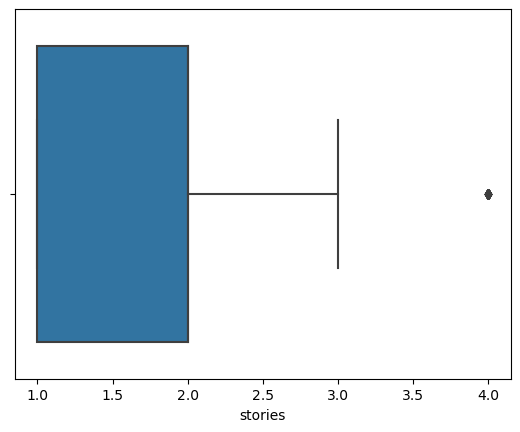

In [11]:
sns.boxplot(x=df['stories'])

<AxesSubplot:xlabel='parking'>

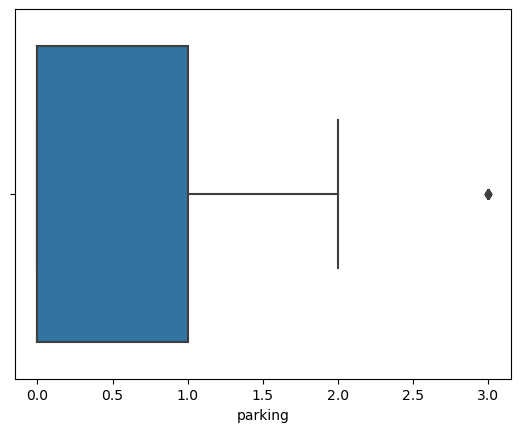

In [12]:
sns.boxplot(x=df['parking'])

In [13]:
#Removing outliers from Price
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

<AxesSubplot:xlabel='price'>

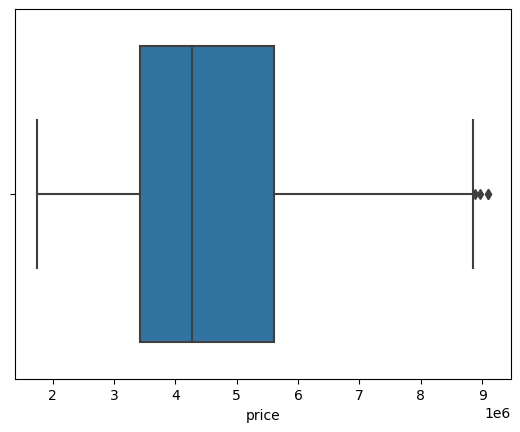

In [14]:
sns.boxplot(x=df['price'])

In [15]:
#Removing outliers from area 
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area<= Q3 + 1.5*IQR)]

<AxesSubplot:xlabel='area'>

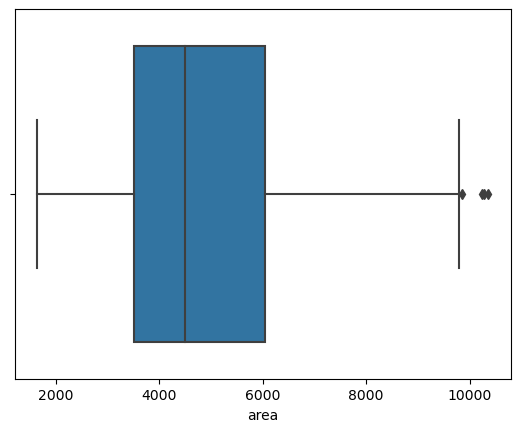

In [16]:
sns.boxplot(x=df['area'])

In [17]:
c =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
df[c] = df[c].apply(binary_map)

In [18]:
df[c]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
15,1,0,1,0,0,0
16,1,1,1,0,1,1
17,1,0,0,0,1,0
18,1,1,0,0,1,0
19,1,0,0,0,1,1
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [19]:
stat=pd.get_dummies(df['furnishingstatus'])

In [20]:
stat.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [21]:
stat=pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [22]:
df=pd.concat([df, stat],axis=1)


In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [24]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'semi-furnished',
       'unfurnished'],
      dtype='object')

In [25]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [26]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [27]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,5600000,6360,3,1,3,1,0,0,0,0,0,1,1,0
236,4620000,2870,2,1,2,1,1,1,0,0,0,1,1,0
356,3773000,2520,5,2,1,0,0,1,0,1,1,0,0,0
425,3360000,3185,2,1,1,1,0,1,0,0,2,0,0,0
516,2450000,3240,2,1,1,0,1,0,0,0,1,0,0,1


In [28]:
df_train.shape

(361, 14)

In [29]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
287,4200000,5500,3,1,2,1,0,0,0,1,0,0,0,1
166,5320000,7800,3,1,1,1,0,1,0,1,2,1,0,1
176,5250000,8520,3,1,1,1,0,0,0,1,2,0,0,0
282,4270000,2175,3,1,2,0,1,1,0,1,0,0,0,1


In [30]:
df_test.shape

(156, 14)

In [31]:
scaler = MinMaxScaler()

In [32]:
scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [33]:
df_train[scale] = scaler.fit_transform(df_train[scale])


In [34]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [35]:
y_train = df_train.pop('price')
#Target Variable Seprated 
x_train = df_train

In [36]:
y_train.head()

148    0.523810
236    0.390476
356    0.275238
425    0.219048
516    0.095238
Name: price, dtype: float64

In [37]:
linear_regression = LinearRegression()

In [38]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [39]:
score = linear_regression.score(x_train, y_train)
print(score)

0.6517266977942342


In [40]:
scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']


In [41]:
df_test[scale] = scaler.fit_transform(df_test[scale])


In [42]:
#Seprating Targeting variable from testing subset
y_test = df_test.pop('price')
x_test = df_test

In [43]:
pred=linear_regression.predict(x_test)

In [44]:
y_test.shape
y_test_matrix = y_test.values.reshape(-1, 1)

In [46]:
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': pred.flatten()})


In [47]:
data_frame.head(10)


,actual,predicted
0,0.375000,0.484648
1,0.326923,0.378427
2,0.480769,0.582418
3,0.471154,0.533557
4,0.336538,0.264977
5,0.783654,0.704747
6,0.230769,0.234820
7,0.354808,0.350948
8,0.413462,0.627450
9,0.567308,0.633475


Text(0, 0.5, 'Predicted')

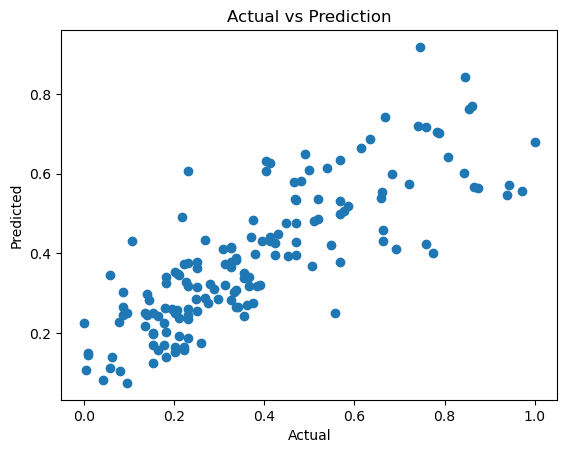

In [50]:

plt.scatter(y_test, pred)
plt.title('Actual vs Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')